<a href="https://colab.research.google.com/github/AIClubRGB/Schafkopf_bot/blob/master/Schafkopf_bot_how_to_train_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test for GPU-availability


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

# Installation of CUDA 8.0 on UBuntu 16.04

In [0]:
%cd ~
!ls


## Installation of gcc, cmake, make

In [0]:
!apt-get update
!apt-get upgrade
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get install libavcodec-dev libavformat-dev libswscale-d


In [0]:
!apt-get -y install cmake
!which cmake

!cmake --version

!apt-get install libopencv-dev

!apt install g++-5

!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20

!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++


## Installation of Cuda 

In [0]:
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

# Setup Yolo/darknet from AlexeyAB

In [0]:
!git clone https://github.com/AlexeyAB/darknet/
  
#!apt-get install vim
  

In [8]:
!ls
%cd darknet


#!vim Makefile

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  darknet
/root/darknet


In [0]:
!ls
!wget https://pjreddie.com/media/files/yolov3-tiny.weights
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/darknet53.conv.74


In [10]:
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty	    DarknetConfig.cmake.in  net_cam_v3.sh
appveyor.yml	    darknet.py		    README.md
build		    darknet_video.py	    scripts
build.ps1	    data		    src
build.sh	    image_yolov2.sh	    video_v2.sh
cfg		    image_yolov3.sh	    video_yolov3.sh
cmake		    include		    yolov3-tiny.weights
CMakeLists.txt	    json_mjpeg_streams.sh   yolov3.weights
CMakeSettings.json  LICENSE
darknet53.conv.74   Makefile


In [0]:
#!vim Makefile

In [0]:
!ls
%cd ../
!ls

In [0]:
%cd ~/darknet
!make

In [0]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
#!./darknet detect cfg/yolov3-tiny_obj.cfg yolov3-tiny.weights data/person.jpg
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
imShow('predictions.jpg')

In [0]:
#imShow('predictions.jpg')

In [0]:
#imShow('predictions.jpg')

# Setup Schafkopf_bot from AIClubRGB

In [0]:
%cd ~/darknet/data
!mkdir obj
!ls
%cd obj

In [0]:
#%cd obj
#%cd .. 
#!rm -r obj
#!ls
!git clone https://github.com/AIClubRGB/Schafkopf_bot.git

In [0]:
%cd Schafkopf_bot
!mv * ../
%cd ..
!rm -r Schafkopf_bot
!ls

In [0]:
!python convcx.py
%cd for_darknet_dir
!mv * ../../..
%cd ../../..
!ls
%cd data/obj/for_data_dir
!mv * ../..
%cd ../..
!ls
%cd obj
!ls

In [0]:
!ls
!mv train0.txt ..
!mv val0.txt ..
%cd ..
!ls
%cd obj
!rm -r for_darknet_dir  for_data_dir  
!ls

In [0]:
!ls
%cd ..
!ls

In [0]:
%cd ..
!ls

In [0]:
#!./darknet partial yolov3-tiny-obj.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15
#!./darknet partial yolov3-tiny-obj.cfg yolov3-tiny-obj_1000.weights yolov3-tiny.conv.15 15

In [0]:
%cd ~/darknet/data/
!ls 

In [0]:
!sed -i 's/train.txt/train0.txt/g' obj.data
!sed -i 's/val.txt/val0.txt/g' obj.data
!cat obj.data


## Training 

In [0]:
%cd ~/darknet
#%cd data/obj
#!mv train0.txt ..
#!mv val0.txt ..
#!cd ..
#!cat data/train0.txt

In [0]:
!./darknet detector train data/obj.data yolo-obj.cfg darknet53.conv.74 -dont_show 

In [0]:
#!./darknet detector train data/obj.data yolov3-tiny-obj.cfg yolov3-tiny.conv.15 -dont_show
#!./darknet detector train data/obj.data yolov3-tiny-obj.cfg yolov3-tiny-obj_2000_tr2.weights -dont_show


#!./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_2000.weights -dont_show 
#!cp backup/yolo-obj_3000.weights yolo-obj_3000.weights
#!./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_3000.weights -dont_show 

## change learn_rate for fine tuning after stagnation of IOU at about 3000 iterations

In [0]:
%cd ~/darknet/
!cat yolo-obj.cfg
!sed -i 's/learning_rate=0.0001/learning_rate=0.00001/g' yolo-obj.cfg
!cat yolo-obj.cfg

In [0]:
!ls
%cd backup
!ls

# For retraining: loading and saving models from google drive

# Setup drive tools

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Save model

In [25]:
%cd ~/darknet/backup/
!ls
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'yolo-obj_1_1000.weights'})
uploaded.SetContentFile('yolo-obj_1000.weights')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

/root/darknet/backup
yolo-obj_1000.weights  yolo-obj_last.weights
     |████████████████████████████████| 993kB 40.0MB/s 
Uploaded file with ID 1Pi8Y6i6gCctjyd-eU0vu7M87jit4Rd4N


change learn_rate and burn_in

In [0]:
%cd ~/darknet/
#!cat yolo-obj.cfg
!sed -i 's/learning_rate=0.001/learning_rate=0.0001/g' yolo-obj.cfg
!sed -i 's/burn_in=1000/burn_in=2000/g' yolo-obj.cfg
!cat yolo-obj.cfg

## Load model from drive


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
#file_id = 'https://drive.google.com/open?id=1FSxixz9iJEvVQdVMCLTHEFaozCNOqcmX' # URL id. 

#downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('yolo-obj_2000.weights')

%cd ~/darknet
!ls /content/gdrive/'My Drive'
!cp /content/gdrive/'My Drive'/yolo-obj_0_1000.weights ~/darknet
!ls 

# Retraining

In [0]:
%cd ~/darknet/
!ls
!mv yolo-obj_0_1000.weights yolo-obj_1000.weights
!ls

In [0]:
!./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_1000.weights -dont_show 

## save retrained model

In [0]:
%cd ~/darknet/backup/
!ls
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'yolo-obj_0_2000.weights'})
uploaded.SetContentFile('yolo-obj_2000.weights')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

/root/darknet/backup
yolo-obj_2000.weights  yolo-obj_last.weights
Uploaded file with ID 1_K9TGWUuAmIGhmTgcRfqPsRBtVwZPGwP


## retraining 2

In [0]:
%cd ~/darknet/backup/
!mv yolo-obj_last.weights ..
%cd ~/darknet/
!ls

/root/darknet/backup
/root/darknet
3rdparty	    DarknetConfig.cmake.in  README.md
appveyor.yml	    darknet.py		    results
backup		    darknet_video.py	    scripts
build		    data		    src
build.ps1	    image_yolov2.sh	    video_v2.sh
build.sh	    image_yolov3.sh	    video_yolov3.sh
cfg		    include		    yolo-obj_2000.weights
chart.png	    json_mjpeg_streams.sh   yolo-obj.cfg
cmake		    LICENSE		    yolo-obj_last.weights
CMakeLists.txt	    Makefile		    yolov3-tiny.weights
CMakeSettings.json  net_cam_v3.sh	    yolov3.weights
darknet		    obj
darknet53.conv.74   predictions.jpg


In [0]:
!ls backup 

yolo-obj_last.weights


In [0]:
!./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_last.weights -dont_show 

In [0]:
%cd ~/darknet/backup/
!ls
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'yolo-obj_0_2900.weights'})
uploaded.SetContentFile('yolo-obj_last.weights')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
#file_id = 'https://drive.google.com/open?id=1FSxixz9iJEvVQdVMCLTHEFaozCNOqcmX' # URL id. 

#downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('yolo-obj_2000.weights')

%cd ~/darknet
!ls /content/gdrive/'My Drive'
!cp /content/gdrive/'My Drive'/yolo-obj_0_2900.weights ~/darknet
!ls 

In [0]:
!mv yolo-obj_0_2900.weights yolo-obj_last.weights

In [0]:
!./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_last.weights -dont_show 

In [0]:
%cd ~/darknet/backup/
!ls
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'yolo-obj_0_3800.weights'})
uploaded.SetContentFile('yolo-obj_last.weights')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

/root/darknet/backup
yolo-obj_3000.weights  yolo-obj_last.weights
Uploaded file with ID 1t2Ez-iu9h067JFQf5g5Me91ZjQDJZvFN


In [0]:
%cd ~/darknet
#!rm  yolo-obj_last.weights
%cd ~/darknet/backup/
#!mv yolo-obj_last.weights ..

/root/darknet
/root/darknet/backup


In [0]:
%cd ~/darknet
!./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_last.weights -dont_show 

In [0]:
%cd ~/darknet/backup/
!ls
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'yolo-obj_0_4000.weights'})
uploaded.SetContentFile('yolo-obj_4000.weights')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

/root/darknet/backup
yolo-obj_3000.weights  yolo-obj_4000.weights  yolo-obj_last.weights
Uploaded file with ID 1wiFQd8RFA4Dxamdo9TGIPebDDbnPG26k


In [35]:
from google.colab import drive
drive.mount('/content/gdrive')
#file_id = 'https://drive.google.com/open?id=1FSxixz9iJEvVQdVMCLTHEFaozCNOqcmX' # URL id. 

#downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('yolo-obj_2000.weights')

%cd ~/darknet
!ls /content/gdrive/'My Drive'
!cp /content/gdrive/'My Drive'/yolo-obj_0_4000.weights ~/darknet
!ls 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/root/darknet
'Colab Notebooks'	   yolo-obj_0_3800.weights   yolo-obj_3000.weights
 yolo-obj_0_1000.weights   yolo-obj_0_4000.weights   yolo-obj_4000.weights
 yolo-obj_0_2000.weights   yolo-obj_1000.weights     yolo-obj_last.weights
 yolo-obj_0_2900.weights   yolo-obj_2000.weights
3rdparty	    DarknetConfig.cmake.in  README.md
appveyor.yml	    darknet.py		    results
backup		    darknet_video.py	    scripts
build		    data		    src
build.ps1	    image_yolov2.sh	    video_v2.sh
build.sh	    image_yolov3.sh	    video_yolov3.sh
cfg		    include		    yolo-obj_0_4000.weights
chart.png	    json_mjpeg_streams.sh   yolo-obj_4000.weights
cmake		    LICENSE		    yolo-obj.cfg
CMakeLists.txt	    Makefile		    yolov3-tiny.weights
CMakeSettings.json  net_cam_v3.sh	    yolov3.weights
darknet		    obj
darknet53.conv.74   predictions.jpg


In [0]:
!mv yolo-obj_0_4000.weights yolo-obj_4000.weights

In [0]:
%cd ~/darknet/
#!cat yolo-obj.cfg
!sed -i 's/learning_rate=0.001/learning_rate=0.00001/g' yolo-obj.cfg
!cat yolo-obj.cfg

In [37]:
%cd ~/darknet
!./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_4000.weights -dont_show 

Region 82 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000007, .5R: -nan, .75R: -nan,  count: 0
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000044, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: 0.730717, Class: 0.676246, Obj: 0.477656, No Obj: 0.000465, .5R: 1.000000, .75R: 0.363636,  count: 11
Region 82 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000007, .5R: -nan, .75R: -nan,  count: 0
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000006, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: 0.661616, Class: 0.689062, Obj: 0.618335, No Obj: 0.000629, .5R: 1.000000, .75R: 0.214286,  count: 14
Region 82 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000007, .5R: -nan, .75R: -nan,  count: 0
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000018, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: 0.740153, Class: 0.656501, Obj: 0.510239, No Obj: 0.000708, .5R: 0.937500, .75R: 0.687500,  count: 16
Region 82 Avg IOU: -nan, Class: -n

In [0]:
%cd ~/darknet/backup/
!ls
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'yolo-obj_0_5000.weights'})
uploaded.SetContentFile('yolo-obj_5000.weights')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
#!mv backup/yolo-obj_5000.weights ..
!mv ~/yolo-obj_5000.weights ~/darknet

In [0]:
!sed -i 's/learning_rate=0.001/learning_rate=0.0000001/g' yolo-obj.cfg
!sed -i 's/max_batches = 64000/max_batches = 128000/g' yolo-obj.cfg
!sed -i 's/steps=51200,57600/steps=102400,115200/g' yolo-obj.cfg
!cat yolo-obj.cfg

In [0]:
%cd ~/darknet
!./darknet detector train data/obj.data yolo-obj.cfg yolo-obj_5000.weights -dont_show 

# Test

In [0]:
%cd ~/darknet/
!ls
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [39]:
%cd ~/darknet
#!./darknet detect yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights data/obj/train/003110976.jpg
#darknet.exe detector test data/obj.data yolo-obj.cfg yolo-obj_8000.weights
#!./darknet detector test data/obj.data ../yolov3-tiny-obj_test.cfg yolov3-tiny-obj_2000_tr2.weights data/obj/train/003110976.jpg 




#!./darknet detector test data/obj.data yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights data/obj/train/003110976.jpg
#!./darknet detector test data/obj.data yolo-obj.cfg yolo-obj_0_1000.weights data/obj/train0/000007269.jpg
#!./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_last.weights data/obj/train0/000007269.jpg
!./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_5000.weights data/obj/train0/000007269.jpg





'''
!./darknet detector test data/obj.data ../yolov3-tiny-obj_test.cfg yolov3-tiny-obj_2000_tr2.weights data/obj/train/003110976.jpg 
!./darknet detector test data/obj.data ../yolov3-tiny-obj_test.cfg yolov3-tiny.weights data/obj/train/003110976.jpg 

#!./darknet detector recall data/obj.data data/obj.data ../yolov3-tiny-obj_test.cfg yolov3-tiny-obj_2000_tr2.weights
#!./darknet detect yolov3-tiny-obj.cfg yolov3-tiny.weights data/obj/train/003110976.jpg

#!./darknet detect yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights 000600862.jpg	
'''

/root/darknet
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0

'\n!./darknet detector test data/obj.data ../yolov3-tiny-obj_test.cfg yolov3-tiny-obj_2000_tr2.weights data/obj/train/003110976.jpg \n!./darknet detector test data/obj.data ../yolov3-tiny-obj_test.cfg yolov3-tiny.weights data/obj/train/003110976.jpg \n\n#!./darknet detector recall data/obj.data data/obj.data ../yolov3-tiny-obj_test.cfg yolov3-tiny-obj_2000_tr2.weights\n#!./darknet detect yolov3-tiny-obj.cfg yolov3-tiny.weights data/obj/train/003110976.jpg\n\n#!./darknet detect yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights 000600862.jpg\t\n'

In [0]:
!ls
%cd ..

In [0]:
!ls 
%cd ~/darknet

yolo-obj_1000.weights  yolo-obj_last.weights  yolov3-tiny-obj_last.weights
/root/darknet


In [0]:
imShow('data/obj/train0/000007269.jpg')
#%cd ../../..
!ls

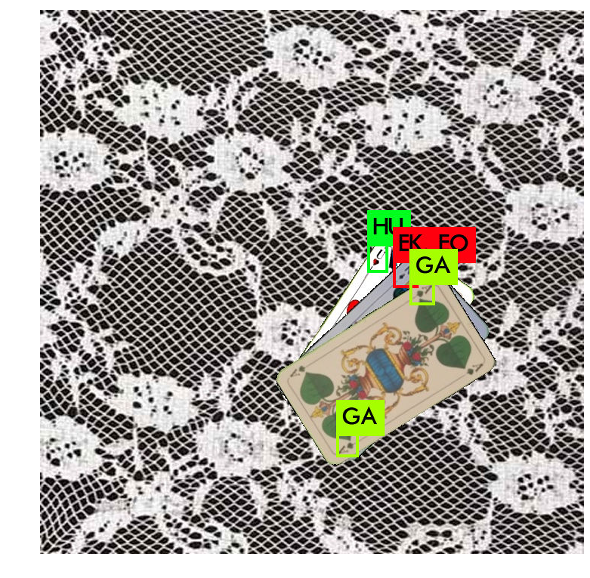

In [40]:
imShow('predictions.jpg')


In [0]:
!./darknet detector recall data/obj.data yolo-obj.cfg yolo-obj_0_1000.weights

In [0]:
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
download('predictions.jpg')

In [0]:
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [0]:
upload()

Saving 000139850.jpg to 000139850.jpg
saved file 000139850.jpg


In [0]:
!./darknet detect yolov3-tiny-obj_test.cfg backup/yolov3-tiny-obj_2000.weights data/obj/train/003110976.jpg -thresh 10

In [0]:
imShow('predictions.jpg')

In [0]:
!./darknet detector train data/obj.data yolo-obj.cfg darknet53.conv.74 -dont_show

In [0]:
!ls

In [0]:
!cat 


anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
%cd data

/content/sample_data/darknet/data


In [0]:
download('train.txt')

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.5 GB  | Proc size: 788.1 MB
GPU RAM Free: 11320MB | Used: 121MB | Util   1% | Total 11441MB


In [0]:
print(gpu)